## Mean-Variance Optimization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
ticker_description = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='descriptions')
prices = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='prices')
tot_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='total returns')
excess_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='excess returns')

ticker_description.head(5)

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,NaN,NaN,NaN
1,EFA,iShares MSCI EAFE ETF,ETF,USD,NaN,NaN,NaN
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,NaN,NaN,NaN
3,PSP,Invesco Global Listed Private E,ETF,USD,NaN,NaN,NaN
4,QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,NaN,NaN,NaN


In [4]:
prices.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
0,2011-01-31,24.350737,24.932129,33.842106,39.154465,41.369602,69.510223,36.002327,22.359201,22.247889,91.488312,99.297096,75.034828
1,2011-02-28,24.511862,25.972059,33.827332,40.544365,41.963394,69.365349,37.629772,23.256830,22.305355,91.496567,102.746445,75.575668
2,2011-03-31,24.718430,26.662436,35.954922,39.576050,41.981182,69.258118,37.218288,23.644442,22.428499,91.512306,102.758766,76.475258
3,2011-04-30,25.924810,27.877144,36.937466,41.802536,42.651890,70.533417,38.953907,25.031689,22.855396,91.562141,105.734825,78.293839
4,2011-05-31,25.573650,26.435223,35.851501,40.880329,42.708733,72.300583,39.348637,23.991255,22.855396,91.552986,104.549042,78.502037


In [5]:
tot_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
0,2011-02-28,0.006617,0.041710,-0.000437,0.035498,0.014353,-0.002084,0.045204,0.040146,0.002583,-0.000410,0.034738,0.007208
1,2011-03-31,0.008427,0.026581,0.062896,-0.023883,0.000424,-0.001546,-0.010935,0.016667,0.005521,-0.000328,0.000120,0.011903
2,2011-04-30,0.048805,0.045559,0.027327,0.056258,0.015976,0.018414,0.046633,0.058671,0.019034,0.000045,0.028962,0.023780
3,2011-05-31,-0.013545,-0.051724,-0.029400,-0.022061,0.001333,0.025054,0.010133,-0.041565,0.000000,-0.000600,-0.011215,0.002659
4,2011-06-30,-0.000097,-0.042645,-0.009355,-0.012108,-0.005705,-0.005043,-0.031060,-0.042581,-0.010776,-0.000327,-0.016869,0.007548


In [6]:
excess_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2011-02-28,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.002993,0.035147,0.007618
1,2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.005849,0.000448,0.012231
2,2011-04-30,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.018989,0.028917,0.023735
3,2011-05-31,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,0.000600,-0.010615,0.003259
4,2011-06-30,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.010449,-0.016542,0.007876


# Summary Statistics


In [7]:
##Summary statistics
from math import sqrt


excess_return_df = excess_return.set_index("Date")
means = excess_return_df.mean() * 12
vol = excess_return_df.std() * sqrt(12)
sharpe = means/vol


In [8]:
print('Mean (annualized) returns by ETF:')
display(round(means, 4))

print('Volatility (annualized) by ETF:')
display(round(vol, 4))

print('Sharpe ratio by ETF:')
display(round(sharpe, 2))

Mean (annualized) returns by ETF:


BWX   -0.0077
DBC   -0.0053
EEM    0.0293
EFA    0.0618
HYG    0.0414
IEF    0.0164
IYR    0.0749
PSP    0.0926
QAI    0.0193
SPY    0.1281
TIP    0.0205
dtype: float64

Volatility (annualized) by ETF:


BWX    0.0828
DBC    0.1666
EEM    0.1762
EFA    0.1509
HYG    0.0759
IEF    0.0634
IYR    0.1687
PSP    0.2134
QAI    0.0491
SPY    0.1428
TIP    0.0511
dtype: float64

Sharpe ratio by ETF:


BWX   -0.09
DBC   -0.03
EEM    0.17
EFA    0.41
HYG    0.54
IEF    0.26
IYR    0.44
PSP    0.43
QAI    0.39
SPY    0.90
TIP    0.40
dtype: float64

## Descriptive Analysis

The code below computes the covariance and correlation matrices from each ETF’s daily excess returns in the dataset.

In [9]:
# Create excess return DataFrame without date column and check for NaN values
excess_return_1 = excess_return.drop(columns=['Date'])
print(excess_return_1.isna().sum())

BWX    0
DBC    0
EEM    0
EFA    0
HYG    0
IEF    0
IYR    0
PSP    0
QAI    0
SPY    0
TIP    0
dtype: int64


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,0.000571,0.000220,0.000756,0.000628,0.000316,2.542502e-04,0.000643,0.000775,0.000213,4.335958e-04,0.000238
DBC,0.000220,0.002312,0.001251,0.001049,0.000487,-2.643418e-04,0.000657,0.001342,0.000324,8.567695e-04,0.000077
EEM,0.000756,0.001251,0.002586,0.001816,0.000770,2.487046e-05,0.001446,0.002350,0.000558,1.442163e-03,0.000284
EFA,0.000628,0.001049,0.001816,0.001898,0.000752,3.401706e-05,0.001483,0.002402,0.000523,1.519370e-03,0.000254
HYG,0.000316,0.000487,0.000770,0.000752,0.000480,7.516839e-05,0.000789,0.001096,0.000251,7.171732e-04,0.000174
IEF,0.000254,-0.000264,0.000025,0.000034,0.000075,3.354040e-04,0.000282,0.000025,0.000047,6.152957e-07,0.000204
IYR,0.000643,0.000657,0.001446,0.001483,0.000789,2.822681e-04,0.002371,0.002249,0.000496,1.515297e-03,0.000430
PSP,0.000775,0.001342,0.002350,0.002402,0.001096,2.530885e-05,0.002249,0.003794,0.000762,2.264700e-03,0.000371
QAI,0.000213,0.000324,0.000558,0.000523,0.000251,4.663690e-05,0.000496,0.000762,0.000201,5.063450e-04,0.000108
SPY,0.000434,0.000857,0.001442,0.001519,0.000717,6.152957e-07,0.001515,0.002265,0.000506,1.700250e-03,0.000232


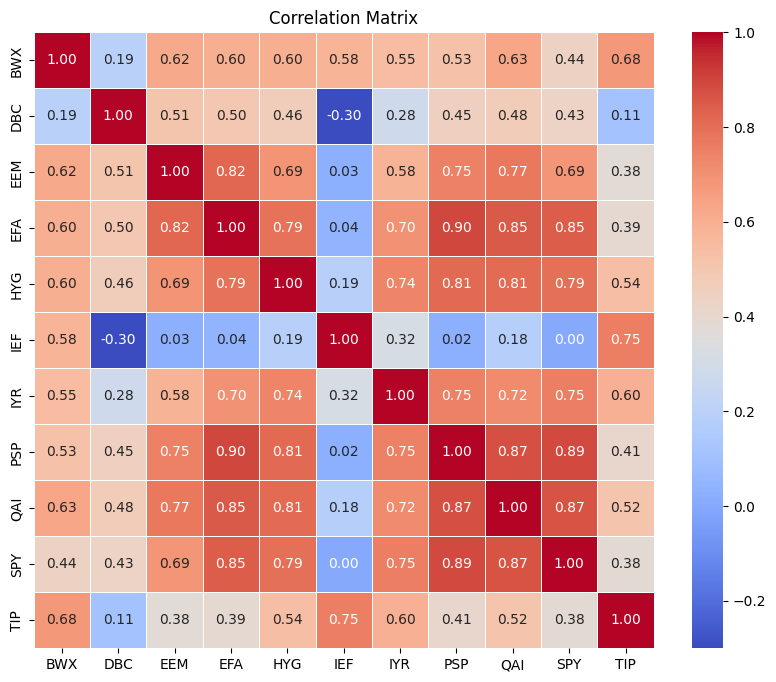

In [10]:
# Build and display covariance matrix
covariance_matrix = excess_return_1.cov()
display(covariance_matrix)

# Build correlation matrix
correlation_matrix = excess_return_1.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Calculate maximum and minimimum correlation coefficients across pairs
max_corr = correlation_matrix[correlation_matrix < 1].max().max()
print(f"Maximum correlation coefficient: {max_corr:.2f}")
min_corr = correlation_matrix.min().min()
print(f"Minimum correlation coefficient: {min_corr:.2f}")

Maximum correlation coefficient: 0.90
Minimum correlation coefficient: -0.30


From the correlation matrix, the highest pairwise correlation is approximately 0.90, between PSP (Invesco Global Listed Private Equity ETF), which tracks listed private equity companies, and EFA (iShares MSCI EAFE ETF), which tracks mid- to large-cap equities in developed markets outside the U.S. and Canada. The lowest pairwise correlation is about -0.30, between IEF (iShares 7–10 Year Treasury Bond ETF), which tracks intermediate-term U.S. Treasuries, and DBC (Invesco DB Commodity Index Tracking Fund), which tracks a diversified commodities index.

Based on the summary statistics, TIPS (TIP) outperformed nominal U.S. Treasuries (IEF) in both annualized return (2.1% vs 1.6%) and risk-adjusted performance (Sharpe 0.40 vs 0.26).

### Mean-Variance

In [12]:
#exclude the date column
data = excess_return.drop('Date',axis=1)

In [13]:
excess_mean = 12*data.mean() 
ones = np.ones(excess_mean.shape[0])
covv = data.cov().to_numpy()
inv_covv = np.linalg.inv(covv)
delta_m = 1/(ones.T@inv_covv@excess_mean)
w_tan = delta_m*inv_covv@excess_mean
w_tan=w_tan.reshape(-1,1)

In [14]:
weights = {name:w_tan[i][0] for i,name in enumerate(data.columns)}
weights_tan = pd.Series(weights).sort_values(ascending=False)
weights_tan

SPY    10.729782
IEF     9.010591
HYG     2.634922
TIP     1.330595
EEM     0.853591
EFA     0.385285
DBC    -0.112341
PSP    -1.716842
IYR    -2.382146
BWX    -6.117430
QAI   -13.616007
dtype: float64

In [15]:
std = data.std()*np.sqrt(12)
shard_ratio = excess_mean/std
shard_ratio = shard_ratio.sort_values(ascending=False)
shard_ratio

SPY    0.897103
HYG    0.544873
IYR    0.444143
PSP    0.433804
EFA    0.409372
TIP    0.401091
QAI    0.393838
IEF    0.258569
EEM    0.166542
DBC   -0.031774
BWX   -0.093202
dtype: float64

In [16]:
tik = {name:{'std':std[name] , 'mean':excess_mean[name] ,'sharpe ratio':shard_ratio[name], 'weight':weights_tan[name] }  for i,name in enumerate(data.columns)}
df = pd.DataFrame(tik).T

In [17]:
#ranking by weights
df2 = df.sort_values(by='weight', ascending=False)
df2

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,10.729782
IEF,0.063442,0.016404,0.258569,9.010591
HYG,0.075928,0.041371,0.544873,2.634922
TIP,0.051115,0.020502,0.401091,1.330595
EEM,0.176164,0.029339,0.166542,0.853591
EFA,0.150903,0.061775,0.409372,0.385285
DBC,0.166553,-0.005292,-0.031774,-0.112341
PSP,0.213370,0.092561,0.433804,-1.716842
IYR,0.168675,0.074916,0.444143,-2.382146
BWX,0.082789,-0.007716,-0.093202,-6.117430


In [18]:
df3 = df.sort_values(by='sharpe ratio', ascending=False)
df3

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,10.729782
HYG,0.075928,0.041371,0.544873,2.634922
IYR,0.168675,0.074916,0.444143,-2.382146
PSP,0.213370,0.092561,0.433804,-1.716842
EFA,0.150903,0.061775,0.409372,0.385285
TIP,0.051115,0.020502,0.401091,1.330595
QAI,0.049073,0.019327,0.393838,-13.616007
IEF,0.063442,0.016404,0.258569,9.010591
EEM,0.176164,0.029339,0.166542,0.853591
DBC,0.166553,-0.005292,-0.031774,-0.112341


As we can see the largest weights coreponded to the largest sharpe ratio. For example SPY who had the largest weight coresponded to the best sharpe ratio. However, it is not exactly in descending order, since the second largest weight is IEF but it did not corespond to the second largest sharpe ratio, whihc in this case was HYG.

In [19]:
# Compute the mean, volatility, and Sharpe ratio for the tangency portfolio
mean_tan = w_tan.T@excess_mean.to_numpy()
vol_tan = w_tan.T@covv@w_tan
sharpe_ration = mean_tan[0]/np.sqrt(vol_tan[0][0])
print(f'Mean: {mean_tan[0]:.2f}\nVolatility: {vol_tan[0][0]:.2f}\nShraper Ratio: {sharpe_ration:.2f}')


Mean: 1.16
Volatility: 0.05
Shraper Ratio: 5.38


These are the following metrics for the tangency portfolio for $w^{tan}$

## Allocations

### Equally-Weighted

In [20]:
#Rescale the entire weighting vector to have target mean
X = excess_return.copy()
if not isinstance(X.index, (pd.DatetimeIndex, pd.PeriodIndex)):
   X = X.set_index(X.columns[0])
X.index = pd.to_datetime(X.index)
X = X.apply(pd.to_numeric, errors = 'coerce').dropna()
#Monthly:
mu_m = X.mean()
sigma_m = X.cov()


target_mu = 0.01
def rescale(w, mu, target):
   mu_p = float(w @ mu)
   return w * (target / mu_p)
n = X.shape[1]
w_eq = np.ones(n)/n
w_eq = rescale(w_eq, mu_m, target_mu)
print(w_eq)

[0.25460008 0.25460008 0.25460008 0.25460008 0.25460008 0.25460008
 0.25460008 0.25460008 0.25460008 0.25460008 0.25460008]


### Risk-Parity

In [21]:
inv_var = 1/np.diag(sigma_m)
w_rp = inv_var / inv_var.sum()
w_rp = rescale(w_rp, mu_m, target_mu)
print(w_rp)

[0.43322929 0.10704369 0.09568161 0.13039722 0.51506362 0.73775818
 0.1043665  0.06522271 1.23306081 0.14553569 1.13648058]
